# **Titanic Dataset Code**<hr>

## **1. Business Understanding**<br>

### **1.1 Stakeholders**<br>
The competition organizer is Kaggle. Thi is a test competition to help beginners get comfortable with Kaggle competitions. 

### **1.2 Problem Statement**<br>
I have entered my first kaggle competition, The Titanic Dataset competition.The competition is straightforward: develop a model that uses machine learning to forecast which Titanic passengers will survive. So this is our task.

### **1.3 Competition Objectives**<br>
Create a model that is highly accurate in predicting who survived or not.


### **1.4 Model Objectives**<br>
* **Our main model objective is having an accuracy of 100%**

## **2. Data Understanding**<hr>

In [44]:
# data manipulation
import numpy as np
import pandas as pd 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# models
# preprocessors
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay,
    make_scorer
)


In [45]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **2.1 Descriptive statistics**

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see the Age,Cabin and Embarked columns have null columns

In [49]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
# Let's deal with age
train["Age"] = train["Age"].fillna(train["Age"].median())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now let's deal with embarked

In [51]:
# Let's look at the values in embarked
train["Embarked"].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [52]:
# Lets fill in with the mode
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [53]:
#We will drop cabin for now
train = train.drop(columns=["Cabin"], axis=1)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [55]:
# Dropping duplicates
train.drop_duplicates(inplace=True)

### **2.2 Data Visualization And Analysis**

Let's look at each column

* Pclass

<Axes: xlabel='Pclass', ylabel='Count'>

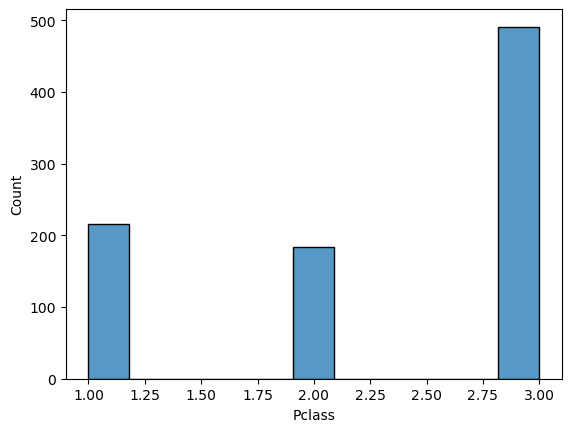

In [56]:
sns.histplot(train,x="Pclass")

<Axes: title={'center': "Barchart of mean age of those who survived vs those who didn't"}, xlabel='Survived', ylabel='Mean Age'>

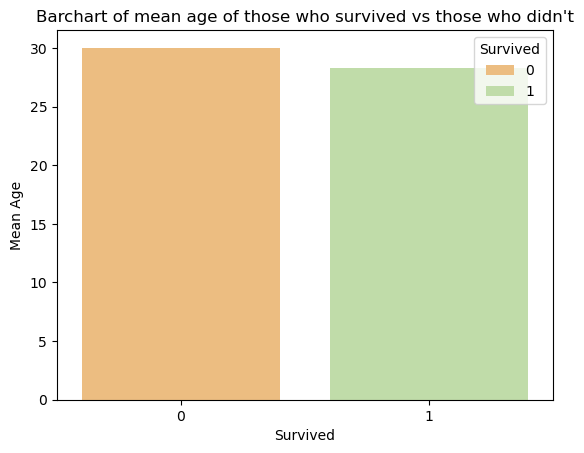

In [57]:
chartX = train.groupby("Survived")["Age"].mean()
title = "Barchart of mean age of those who survived vs those who didn't"
y_label = "Mean Age"
plt.title(title)
plt.ylabel(y_label)
sns.barplot(x=chartX.index, y=chartX.values, hue=chartX.index, palette="Spectral")

Let's look at the sex

In [58]:
# Let's look at the distribution of the sexes
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [59]:
# Counts oof the sex of the survivors
train[train["Survived"]==1]["Sex"].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

The two tables are flipped. This means that while there were more men than women(probably cause in those days men were ikely to afford the ticket) women were more likely to survive by a very wide margin

In [60]:
chartX = train.groupby("Sex")["Survived"].mean()
chartX

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: title={'center': 'Barchart of the proportion of those who survived vs those who dont'}, xlabel='Sex', ylabel='Percentage of the gender that survived in %'>

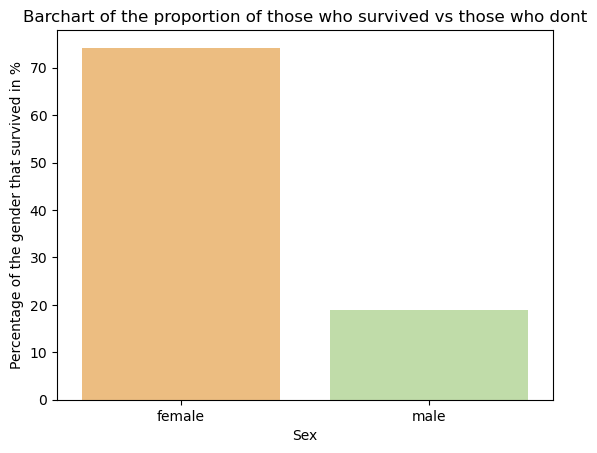

In [61]:
title = "Barchart of the proportion of those who survived vs those who dont"
y_label = "Percentage of the gender that survived in %"
plt.title(title)
plt.ylabel(y_label)
sns.barplot(x=chartX.index, y= chartX.values * 100, hue=chartX.index, palette="Spectral")

In [62]:
chartX = train.groupby(["Survived", "Sex"])["Age"].mean()
chartX

Survived  Sex   
0         female    25.666667
          male      30.783120
1         female    28.716738
          male      27.382294
Name: Age, dtype: float64

<Figure size 640x480 with 0 Axes>

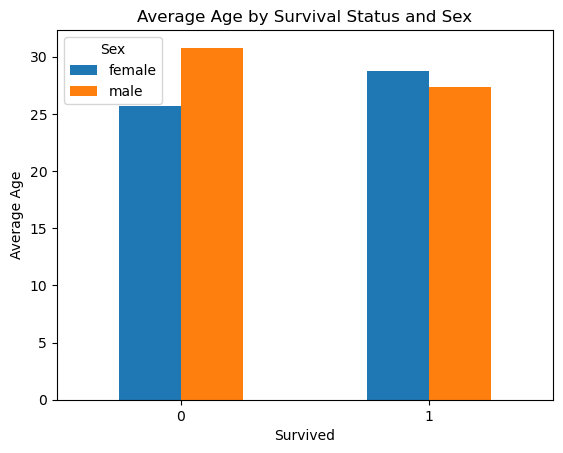

In [63]:
# Converts the above output into a DataFrame
table = chartX.unstack()

#plotting it 
plt.figure()
table.plot(kind="bar")

plt.xlabel("Survived")
plt.ylabel("Average Age")
plt.title("Average Age by Survival Status and Sex")
plt.xticks(rotation=0)

plt.show()

* 74% of females survived compared to 18%

In [64]:
chartX = train.groupby("Pclass")["Survived"].mean()

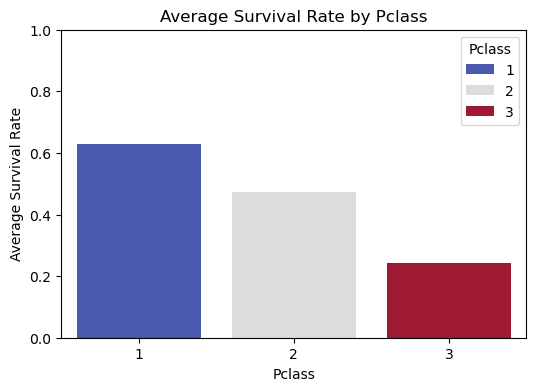

In [65]:
chartX = train.groupby("Pclass")["Survived"].mean()
chart_df = chartX.reset_index() 
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived", hue="Pclass", data=chart_df, palette="coolwarm")
plt.title("Average Survival Rate by Pclass")
plt.ylabel("Average Survival Rate")
plt.ylim(0, 1)
plt.show()

We can see that 1st class passengers were likely to survive. Maybe it's because they were better equipped with emergency kits and tools.

<Axes: xlabel='Age', ylabel='Count'>

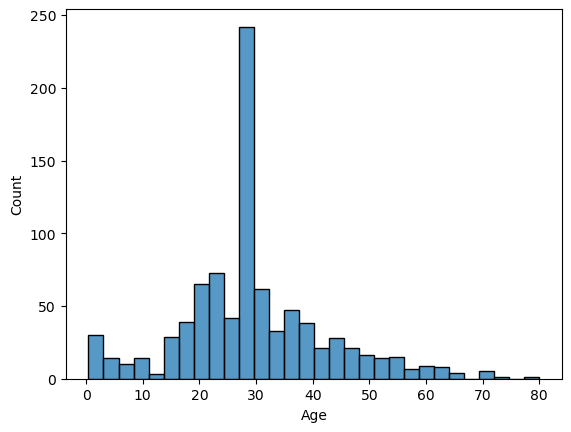

In [66]:
sns.histplot(data=train, x="Age")

<Axes: xlabel='Age', ylabel='Count'>

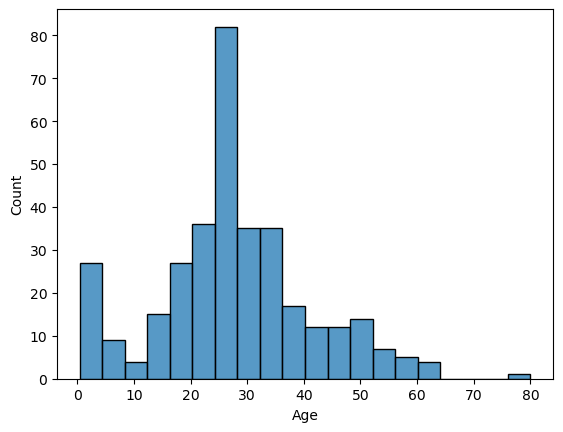

In [67]:
chartXs = train[train["Survived"]==1]
sns.histplot(data=chartXs, x="Age")


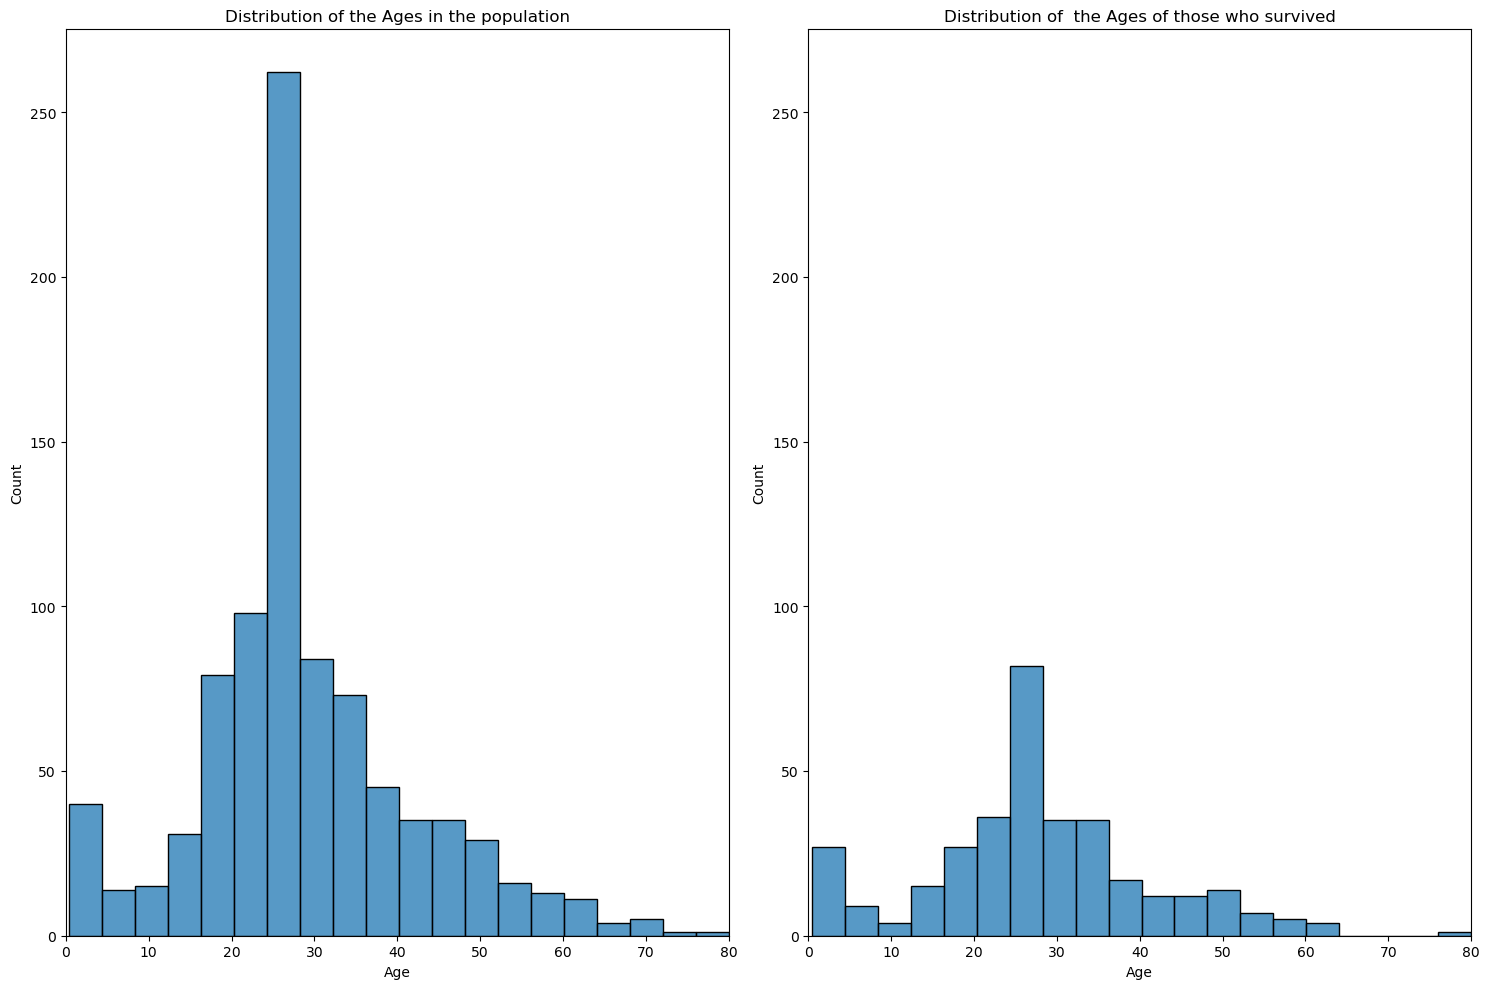

In [68]:
fig, ax = plt.subplots(1,2, figsize=(15, 10), sharey=True)

bins=20

ax[0].set_title("Distribution of the Ages in the population")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")
ax[0].set_xlim(0, 80)
sns.histplot(data=train, x="Age", ax=ax[0], bins=bins)


ax[1].set_title("Distribution of  the Ages of those who survived")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count")
ax[1].set_xlim(0, 80)
ax[1].tick_params(labelleft=True) 
sns.histplot(data=chartXs, x="Age", ax=ax[1], bins=bins)

plt.tight_layout()
plt.show()

We can see infants had a high survival rate while the youth had the highest mortality rate especially the mid 20's.

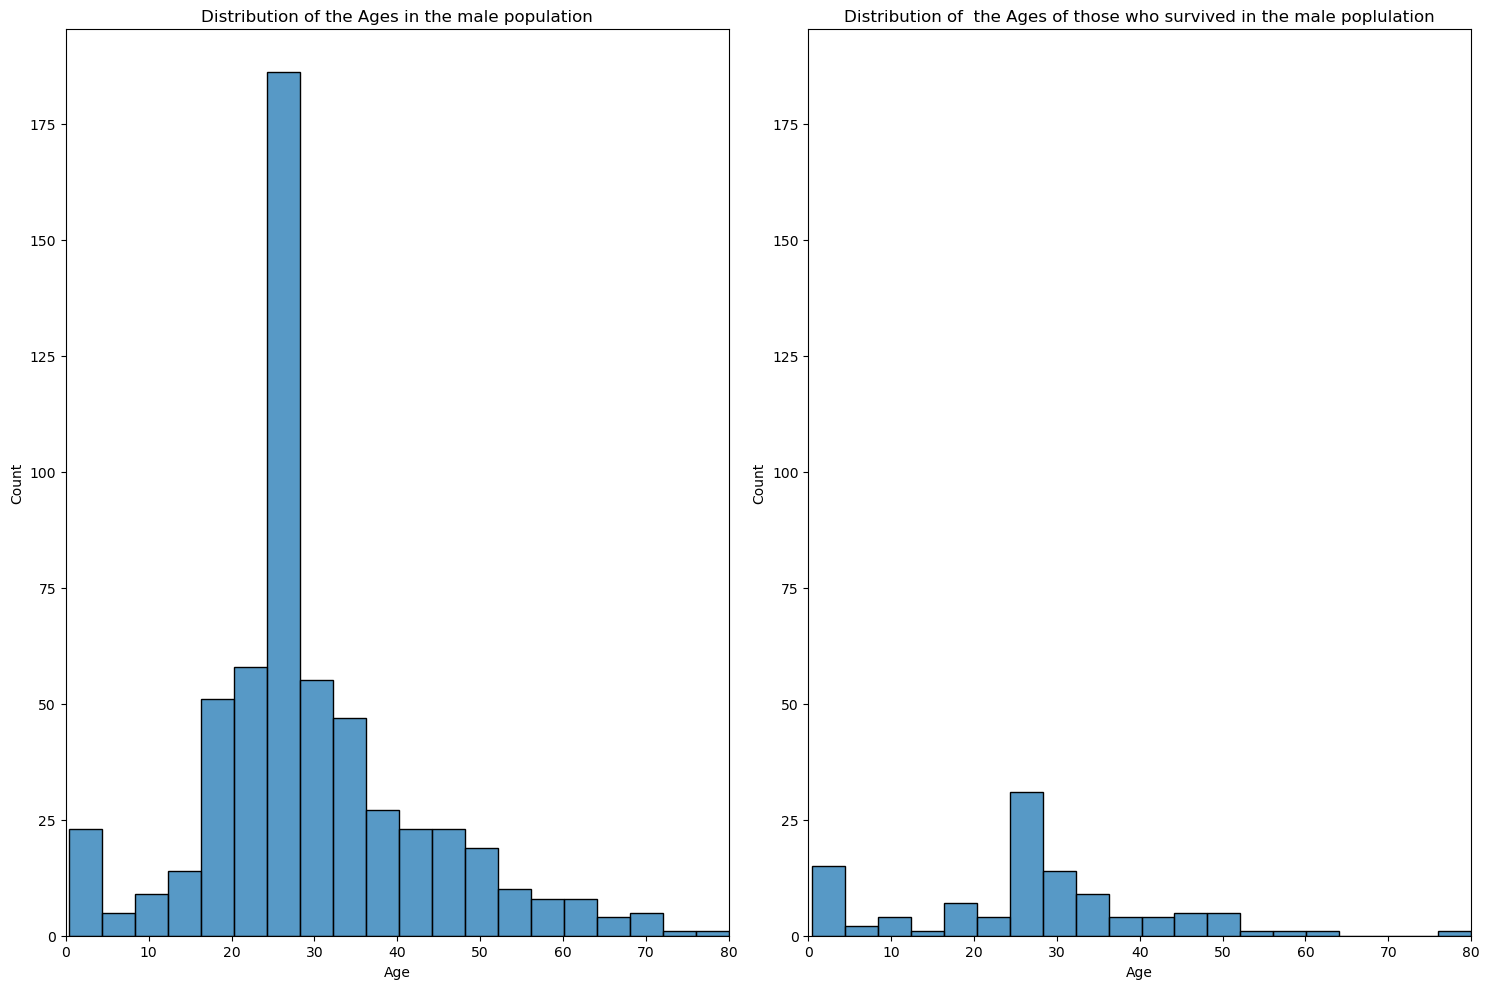

In [69]:
# Let's look at the age demographics of men
fig, ax = plt.subplots(1,2, figsize=(15, 10), sharey=True)

bins=20

chartdfm = train[train["Sex"]=="male"]
chartdfms = chartdfm[chartdfm["Survived"]==1] 

ax[0].set_title("Distribution of the Ages in the male population")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")
ax[0].set_xlim(0, 80)
sns.histplot(data=chartdfm, x="Age", ax=ax[0], bins=bins)


ax[1].set_title("Distribution of  the Ages of those who survived in the male poplulation")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count")
ax[1].set_xlim(0, 80)
ax[1].tick_params(labelleft=True) 
sns.histplot(data=chartdfms, x="Age", ax=ax[1], bins=bins)

plt.tight_layout()
plt.show()

We can confirm again that most of the male's died since the difference in the 2 charts is day and night. The trend is the same as the one above only that the male's on


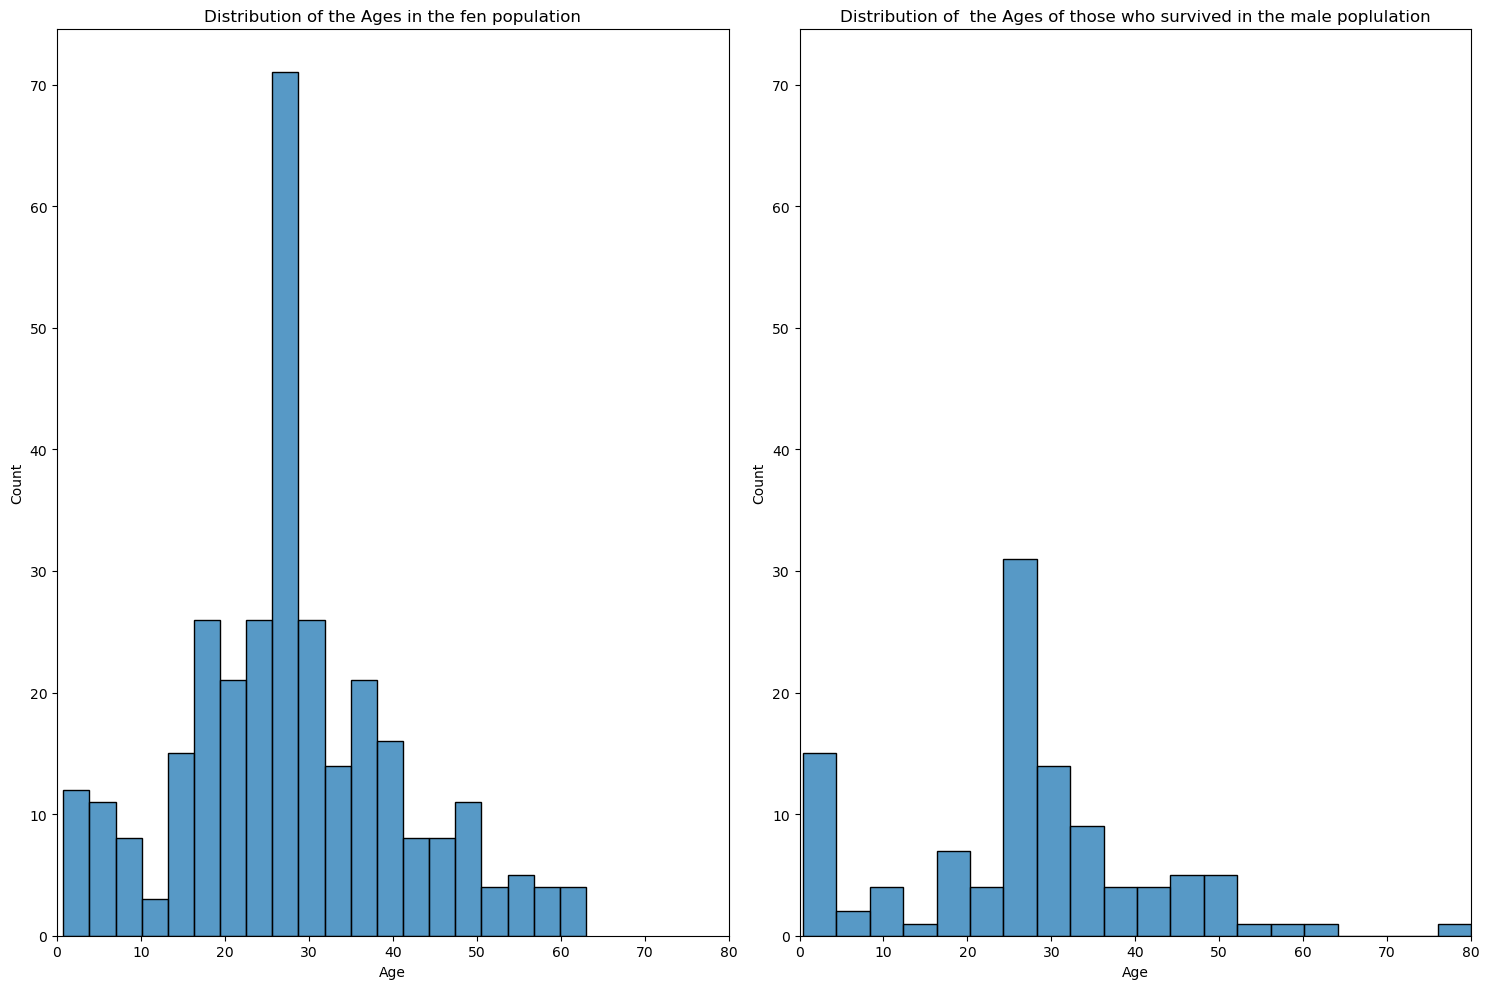

In [70]:
# Let's look at the age demographics of females
fig, ax = plt.subplots(1,2, figsize=(15, 10), sharey=True)

bins=20

chartdff = train[train["Sex"]=="female"]
chartdffs = chartdfm[chartdfm["Survived"]==1] 

ax[0].set_title("Distribution of the Ages in the fen population")
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")
ax[0].set_xlim(0, 80)
sns.histplot(data=chartdff, x="Age", ax=ax[0], bins=bins)


ax[1].set_title("Distribution of  the Ages of those who survived in the male poplulation")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Count")
ax[1].set_xlim(0, 80)
ax[1].tick_params(labelleft=True) 
sns.histplot(data=chartdffs, x="Age", ax=ax[1], bins=bins)

plt.tight_layout()
plt.show()

While females were more likely to survive, they same general pattern persists. Females in there middle ages were also not spared, since they also had a considerable amount losses. However, they had a higher chance to survive. 

## **3.Data Preparation**<hr>

In [71]:
#Lets define categorical and numerical columns in arrays for use in appropriate contexts
categorical_cols = ["Pclass", "Sex", "Embarked"]
numerical_cols = ["Age"]
y_cols = ["Survived"]
X_cols =  categorical_cols + numerical_cols
X_cols 

['Pclass', 'Sex', 'Embarked', 'Age']

In [72]:
#preparing training and test data
X = train.drop(columns=["Survived", "PassengerId", "Name"])
y = train["Survived"]

X_pred = test.drop(columns=["PassengerId", "Name"])

In [73]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S


In [74]:
#Let's split the train data so that we can have test data
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);

## **4. Modelling**<hr>

In [75]:
# Our function for analyzing our models
def analyze_model(name, model, Xtest = X_test, ytest= y_test):
    ypred = model.predict(Xtest)
    line = "--------------------"
    print(f"{line} {name} model analytics {line}\n")
    cm = confusion_matrix(ytest, ypred)
    print(f"accuracy score = {accuracy_score(ytest, ypred)}")
    print(f"recallscore = {recall_score(ytest, ypred)}")
    print(f"f1 score = {f1_score(ytest, ypred)}")
    print(f"confusion matrix = \n{cm}")
    print(classification_report(ytest, ypred))
    ConfusionMatrixDisplay.from_estimator(model, Xtest, ytest, normalize='true', cmap='Blues', display_labels=["No", "Yes"])

### **Logistic Regression**<br>

Let's start  with logistic regression. We will train a base model then tune it

In [76]:
base_log_pp = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop="first"), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)
p_base_log = Pipeline([
    ("preprocessing", base_log_pp),
    ('model', LogisticRegression(random_state=42))
])

p_base_log.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


-------------------- Base Logistic Regression model analytics --------------------

accuracy score = 0.7877094972067039
recallscore = 0.7162162162162162
f1 score = 0.7361111111111112
confusion matrix = 
[[88 17]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       105
           1       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



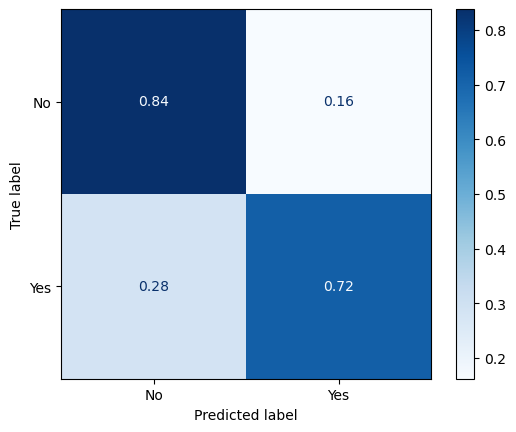

In [77]:
analyze_model("Base Logistic Regression", p_base_log)

This model fails to meet our accuracy so let's try to tune it

In [78]:
log_grid_params = [
    {"model__max_iter":[100,110, 120, 140, 150]},
    {
        'model__penalty': ['l1'],
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['liblinear']
    },
    {
        'model__penalty': ['l2'],
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear']
    }
]
log_grid = GridSearchCV(
    p_base_log,
    log_grid_params,
    cv = 5,
    scoring="accuracy",
    n_jobs = -1
)
log_grid.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"[{'model__max_iter': [100, 110, ...]}, {'model__C': [0.01, 0.1, ...], 'model__penalty': ['l1'], 'model__solver': ['liblinear']}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('cat', ...), ('num', ...)]"


-------------------- Grid Log Reg model analytics --------------------

accuracy score = 0.7932960893854749
recallscore = 0.6891891891891891
f1 score = 0.7338129496402878
confusion matrix = 
[[91 14]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



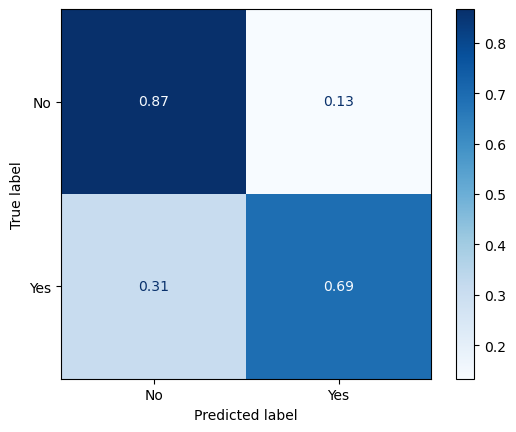

In [79]:
analyze_model("Grid Log Reg", log_grid)

# **5. Evaluate**<hr>